In [0]:
import tensorflow.compat.v1 as tf
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 1s 0us/step


In [0]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newwire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

557056/550378 [==============================] - 0s 1us/step


In [0]:
import numpy as np

def vectorize_seq(seq, dimension=10000):
    results = np.zeros((len(seq), dimension))
    for i, seq in enumerate(seq):
        results[i, seq] = 1.
    return results

x_train = vectorize_seq(train_data)
x_test = vectorize_seq(test_data)

In [0]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [0]:
from keras.callbacks import LambdaCallback

print_weights = LambdaCallback(on_epoch_end=lambda epoch, logs: print(model.layers[1].get_weights()))

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[print_weights]
                    )

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7168/7982 [=========================>....] - ETA: 0s - loss: 2.7238 - acc: 0.5257[array([[ 0.04234605,  0.19786516, -0.17618774, ..., -0.04548423,
        -0.06868155,  0.0771151 ],
       [ 0.1604822 ,  0.18904792, -0.17954578, ...,  0.19607422,
        -0.00504608, -0.10556792],
       [-0.0060415 , -0.06670301, -0.09455808, ...,  0.06623014,
        -0.13712852,  0.12357553],
       ...,
       [ 0.04827552,  0.13655901, -0.00138563, ...,  0.07304478,
         0.01303084,  0.07187991],
       [-0.09510935, -0.15352558, -0.11502325, ..., -0.07327459,
         0.20583338,  0.05894921],
       [ 0.16800481,  0.12114218, -0.09911858, ..., -0.1181572 ,
         0.24105734, -0.14476624]], dtype=float32), array([ 0.02172511,  0.02792382, -0.0082098 ,  0.00653477, -0.01552477,
        0.01621986, -0.00018996, -0.00729594,  0.00244957,  0.01881237,
       -0.00746849, -0.00807817, -0.00579609, -0.01494705,  0.0082103 ,
       -0.0034

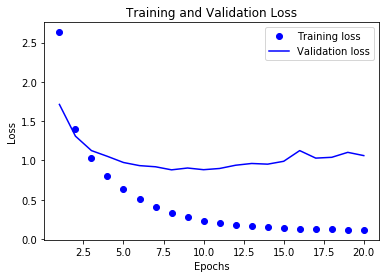

In [0]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title("Training and Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

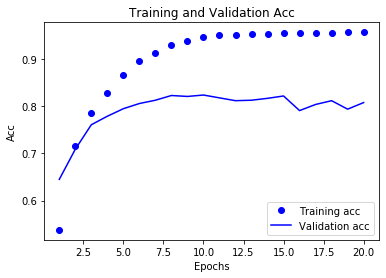

In [0]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label="Training acc")
plt.plot(epochs, val_acc, 'b', label="Validation acc")
plt.title("Training and Validation Acc")
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()